Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import re

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Loading Dataset

In [2]:
df= pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Droping non-required features

In [3]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ["class","message"]       #change the column name

df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['len'] = [len(text) for text in df.message]
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
df.groupby(['class']).describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [7]:
df['class'].value_counts()/df['class'].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

In [8]:
df['class'].shape

(5572,)

In [9]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Word Cloud

In [10]:
stopwords_list = nltk.corpus.stopwords.words("english")   # stopwords list for english
tokenizer = nltk.word_tokenize      # to tokenize

In [11]:
from collections import Counter 
common_words={'word':[],'count':[]} 
for word in df['message']: 
    tok = tokenizer(word) 
    #print(tok) 
    m_counter = Counter(tok) 
    #print(m_counter) 
    #print(m_counter.most_common(1)) 
    common_words['word'].append(m_counter.most_common(1)[0][0]) 
    common_words['count'].append(m_counter.most_common(1)[0][1]) 
    #print("=============") 

In [12]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1) 
common_words_df 

,class,message,len,word,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [13]:
# Most frequent words
#' '.join(common_words_df['word'])

In [14]:
#! pip install wordcloud
import wordcloud
word_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df['word']))

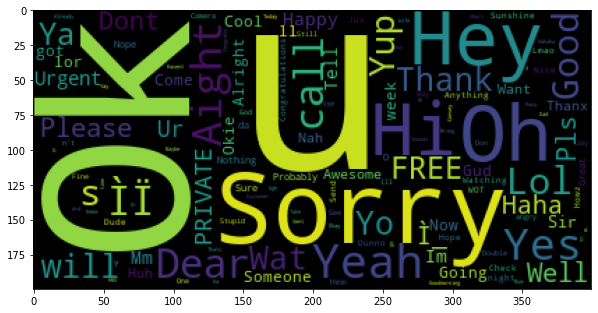

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(word_cloud)

In [16]:
df.drop(['len'],axis=1,inplace=True)

In [17]:
def remove_punch(text): 
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower()) 
    return clean_words 
    
df.message = df.message.apply(remove_punch) 

In [18]:
def remove_whitespace(text): 
    cleaned_space = re.sub(' +'," ",text) 
    return cleaned_space 
    
df.message = df.message.apply(remove_whitespace) 

In [19]:
df.message[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '

In [20]:
def remove_stopwords(text): 
    tok_word = tokenizer(text) 
    clean_words=[] 
    for word in tok_word: 
        if word in stopwords_list: 
            continue 
        else: 
            clean_words.append(word) 
    words = ' '.join(clean_words) 
    return words 
            
df.message = df.message.apply(remove_stopwords) 

In [21]:
df.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [22]:
ham_class = df[df["class"]=="ham"]
spam_class = df[df["class"]=="spam"]

In [23]:
ham_class.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object

In [24]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [25]:
#ham_text

In [26]:
ham_words_cloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud = wordcloud.WordCloud().generate_from_text(spam_text)

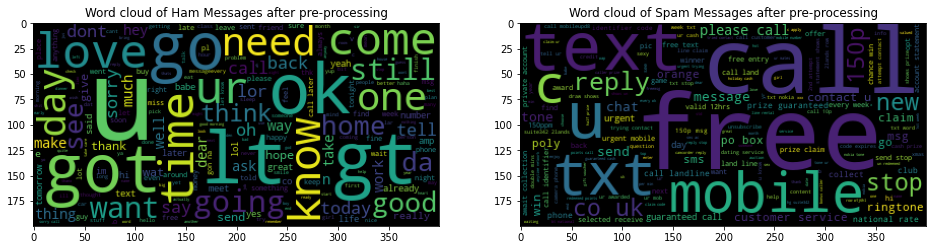

In [27]:
plt.figure(figsize=(16,12)) 
plt.subplot(121) 
plt.title("Word cloud of Ham Messages after pre-processing") 
plt.imshow(ham_words_cloud) 
plt.subplot(122) 
plt.title("Word cloud of Spam Messages after pre-processing") 
plt.imshow(spam_words_cloud) 

In [28]:
def remove_digits(text): 
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower()) 
    return clean_words 
    
df.message = df.message.apply(remove_digits) 

In [29]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [30]:
df.message = df.message.apply(remove_whitespace)
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [31]:
def lemma(text): 
    tok_word = tokenizer(text) 
    lemma_word =[] 
    # print("token :",tok_word) 
    for tok in tok_word:
        lm=nltk.WordNetLemmatizer()  
        lemma_tok = lm.lemmatize(tok) 
        lemma_word.append(lemma_tok) 
    # print("lemmatization :",lemma_word) 
    final_text= " ".join(lemma_word) 
    # print("Final text :",final_text) 
    return final_text 

In [32]:
df.message = df.message.apply(lemma)
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over'

Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2)) 
scaled_X = cv.fit_transform(df.message) 

In [34]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names()) 
df_bow_sklearn.head() 

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,ym,yo,yo yo,yoga,yogasana,yr,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df['class'] = df['class'].map({'spam':1,'ham':0})

In [36]:
#Train Test Split

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['class'],test_size=0.3,random_state=42) 

In [37]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred)
print(f"Train Acuracy : {clf.score(X_train,y_train)}")
print(f"Test Acuracy : {clf.score(X_test,y_test)}")

Train Acuracy : 0.9997435897435898
Test Acuracy : 0.972488038277512


TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500) 
scaled_X_tf = tf_idf.fit_transform(df.message) 

In [39]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names()) 
df_tfidf_sklearn.head() 

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,account,account statement,...,yet,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# train Test split 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['class'],test_size=0.3,random_state=42) 

In [41]:
clf_tfidf = RandomForestClassifier() 
clf_tfidf.fit(X_train, y_train) 

print(f"Train Acuracy : {clf_tfidf.score(X_train,y_train)}")
print(f"Test Acuracy : {clf_tfidf.score(X_test,y_test)}")

Train Acuracy : 0.9997435897435898
Test Acuracy : 0.9796650717703349


In [42]:
ytrain_pred=clf_tfidf.predict_proba(X_train)
print(f"RF training ROC- AUC Accuarcy is : {roc_auc_score(y_train,ytrain_pred[:,1])}")
ytest_prob = clf_tfidf.predict_proba(X_test)
print(f"RF test ROC- AUC Accuarcy is : {roc_auc_score(y_test,ytest_prob[:,1])}")

RF training ROC- AUC Accuarcy is : 0.9999997191667566
RF test ROC- AUC Accuarcy is : 0.9860169638002934


Word2Vec

In [43]:
#! pip install gensim


In [44]:
df.head()

,class,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [45]:
from nltk import sent_tokenize 
words=[] 
for sent in df.message:
    words.append(sent_tokenize(sent)) 

In [46]:
#import gensim 
#import gensim.downloader as api 
#wv=api.load('word2vec-google-news-300') 

In [49]:
#from gensim.utils import simple_reprocessing

import gensim 
import gensim.downloader as api 
# wv = api.load('word2vec-google-news-300') 

In [50]:
! pip install gensim

In [52]:
gensim.models.Word2Vec()

In [ ]:
for X_val,class_val

In [ ]:
X_cleaned = df.drop([100],axis=1)
y_cleaned = df[100]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)


In [ ]:
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

In [ ]:
clf_word2vec.score(X_train,y_train)